In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_json('Electronics.json',lines=True, nrows = 80000)

In [4]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"07 17, 2002",A1N070NS9CJQ2I,0060009810,{'Format:': ' Hardcover'},Teri Adams,This was the first time I read Garcia-Aguilera...,Hit The Spot!,1026864000,NaN,NaN
1,5,False,"07 6, 2002",A3P0KRKOBQK1KN,0060009810,{'Format:': ' Hardcover'},Willa C.,"As with all of Ms. Garcia-Aguilera's books, I ...",one hot summer is HOT HOT HOT!,1025913600,NaN,NaN
2,5,False,"07 3, 2002",A192HO2ICJ75VU,0060009810,{'Format:': ' Hardcover'},Kit,I've not read any of Ms Aguilera's works befor...,One Hot Summer,1025654400,2,NaN
3,4,False,"06 30, 2002",A2T278FKFL3BLT,0060009810,{'Format:': ' Hardcover'},Andres,This romance novel is right up there with the ...,I love this book!,1025395200,3,NaN
4,5,False,"06 28, 2002",A2ZUXVTW8RXBXW,0060009810,{'Format:': ' Hardcover'},John,Carolina Garcia Aguilera has done it again. S...,One Hot Book,1025222400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,5,True,"01 2, 2018",A2J3OA29JDC3DV,B00004VXNF,{'Style:': ' PRO520XL'},Amazon Customer,Best cb for the buck ever. Plugged This bad bo...,Best cb for the buck ever,1514851200,NaN,NaN
79996,5,True,"01 1, 2018",A284SZ58HC8Y11,B00004VXNF,{'Style:': ' PRO520XL'},JoshH,Very easy to setup and sounds great.,Five Stars,1514764800,NaN,NaN
79997,4,True,"12 30, 2017",A1GI2YRCYO5GSK,B00004VXNF,{'Style:': ' PRO505XL'},Fabron,Bought this for my driver in my Semi-Truck. Go...,Does the job. Nothing fancy.,1514592000,NaN,NaN
79998,4,True,"12 27, 2017",A3UH74LZN3PK7G,B00004VXNF,{'Style:': ' PRO520XL'},Amazon Prime Member,Works fine.,Good basic CB for the money.,1514332800,NaN,NaN


In [5]:
for i in range(0,len(df)):
    df[['year']] = df.reviewTime[i][-4:]

In [6]:
df.drop(columns = ['style','verified','unixReviewTime','asin','image','reviewTime'],inplace=True)

In [7]:
df

,overall,reviewerID,reviewerName,reviewText,summary,vote,year
0,5,A1N070NS9CJQ2I,Teri Adams,This was the first time I read Garcia-Aguilera...,Hit The Spot!,NaN,2017
1,5,A3P0KRKOBQK1KN,Willa C.,"As with all of Ms. Garcia-Aguilera's books, I ...",one hot summer is HOT HOT HOT!,NaN,2017
2,5,A192HO2ICJ75VU,Kit,I've not read any of Ms Aguilera's works befor...,One Hot Summer,2,2017
3,4,A2T278FKFL3BLT,Andres,This romance novel is right up there with the ...,I love this book!,3,2017
4,5,A2ZUXVTW8RXBXW,John,Carolina Garcia Aguilera has done it again. S...,One Hot Book,NaN,2017
...,...,...,...,...,...,...,...
79995,5,A2J3OA29JDC3DV,Amazon Customer,Best cb for the buck ever. Plugged This bad bo...,Best cb for the buck ever,NaN,2017
79996,5,A284SZ58HC8Y11,JoshH,Very easy to setup and sounds great.,Five Stars,NaN,2017
79997,4,A1GI2YRCYO5GSK,Fabron,Bought this for my driver in my Semi-Truck. Go...,Does the job. Nothing fancy.,NaN,2017
79998,4,A3UH74LZN3PK7G,Amazon Prime Member,Works fine.,Good basic CB for the money.,NaN,2017


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overall       80000 non-null  int64 
 1   reviewerID    80000 non-null  object
 2   reviewerName  79994 non-null  object
 3   reviewText    79988 non-null  object
 4   summary       79993 non-null  object
 5   vote          18833 non-null  object
 6   year          80000 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.3+ MB


overall             0
reviewerID          0
reviewerName        6
reviewText         12
summary             7
vote            61167
year                0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


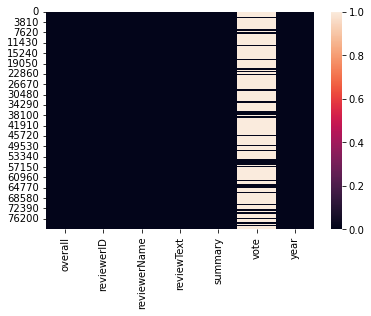

In [9]:
# checking null values
print(df.isnull().sum())
print(sns.heatmap(df.isnull()))

In [10]:
df['vote'] = df['vote'].fillna(0)

In [11]:
le=LabelEncoder()

df['vote']=le.fit_transform(df['vote'].astype(str))

In [12]:
df['reviewerName'] = df['reviewerName'].fillna('Not Given')

In [13]:
df['summary'] = df['summary'].fillna('Not Given')

In [14]:
df['reviewText'] = df['reviewText'].fillna('Not Given')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overall       80000 non-null  int64 
 1   reviewerID    80000 non-null  object
 2   reviewerName  80000 non-null  object
 3   reviewText    80000 non-null  object
 4   summary       80000 non-null  object
 5   vote          80000 non-null  int32 
 6   year          80000 non-null  object
dtypes: int32(1), int64(1), object(5)
memory usage: 4.0+ MB


In [16]:
X = df.drop(columns = ['overall'])
y = df['overall']

In [17]:
X

,reviewerID,reviewerName,reviewText,summary,vote,year
0,A1N070NS9CJQ2I,Teri Adams,This was the first time I read Garcia-Aguilera...,Hit The Spot!,0,2017
1,A3P0KRKOBQK1KN,Willa C.,"As with all of Ms. Garcia-Aguilera's books, I ...",one hot summer is HOT HOT HOT!,0,2017
2,A192HO2ICJ75VU,Kit,I've not read any of Ms Aguilera's works befor...,One Hot Summer,95,2017
3,A2T278FKFL3BLT,Andres,This romance novel is right up there with the ...,I love this book!,145,2017
4,A2ZUXVTW8RXBXW,John,Carolina Garcia Aguilera has done it again. S...,One Hot Book,0,2017
...,...,...,...,...,...,...
79995,A2J3OA29JDC3DV,Amazon Customer,Best cb for the buck ever. Plugged This bad bo...,Best cb for the buck ever,0,2017
79996,A284SZ58HC8Y11,JoshH,Very easy to setup and sounds great.,Five Stars,0,2017
79997,A1GI2YRCYO5GSK,Fabron,Bought this for my driver in my Semi-Truck. Go...,Does the job. Nothing fancy.,0,2017
79998,A3UH74LZN3PK7G,Amazon Prime Member,Works fine.,Good basic CB for the money.,0,2017


In [18]:
y

0        5
1        5
2        5
3        4
4        5
        ..
79995    5
79996    5
79997    4
79998    4
79999    5
Name: overall, Length: 80000, dtype: int64

In [19]:
le=LabelEncoder()
for i in X:
    X[i]=le.fit_transform(X[i].astype(str))

In [20]:
# Treating data imbalance
from imblearn.over_sampling import ADASYN
from collections import Counter

In [21]:
counter = Counter(y)
print(counter)
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({5: 48262, 4: 14076, 1: 8096, 3: 5704, 2: 3862})
Counter({1: 48295, 5: 48262, 2: 46919, 3: 46853, 4: 46771})


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Treating Skew
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(X)

In [24]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=X.columns)
data_new.skew()

reviewerID     -0.275945
reviewerName   -0.296565
reviewText     -0.285616
summary        -0.241494
vote            0.460941
year            0.000000
dtype: float64

In [25]:
x = data_new

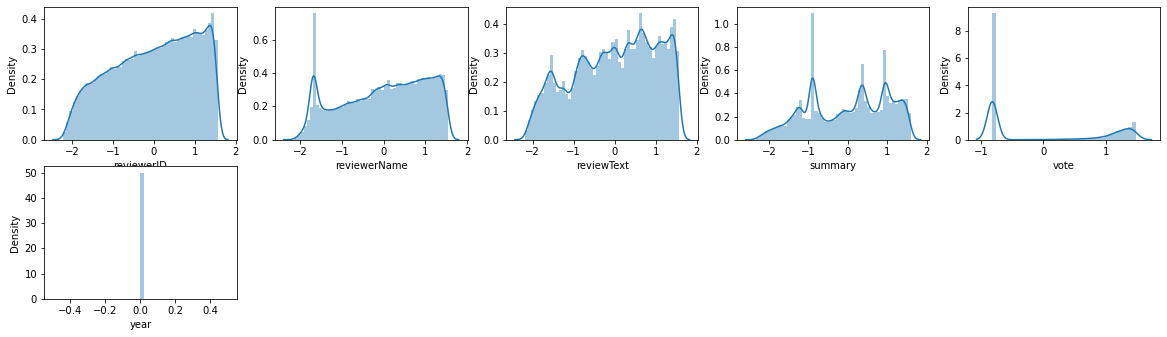

In [26]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

## Model

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_validate

In [29]:
# GPU stat 
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  9% |  7% |


In [30]:
# List of models to be used
en = ElasticNet()
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ar = AdaBoostRegressor(random_state=1)
gbr= GradientBoostingRegressor(random_state=1)

m_list= [en,dtr,rfr,ar,gbr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [31]:
# Fitting models
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  1.423475950242273
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -1.4703948586318223
difference between model score and cross validation score:  0.046918908389549374




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  1.3966157807252852
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -1.6008972619096773
difference between model score and cross validation score:  0.20428148118439204




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  1.003146838460487
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -1.2063284490664286
difference between model score and cross validation score:  0.20318161060594164




AdaBoostRegressor(random_state=1)
Root_mean_squared_error:  1.2879768633405124
cross validation scores below:--  
 AdaBoostRegressor(random_state=1)
root_mean_squared_error:  -1.353306274795

## Hyper Parameter Tuning (HPT)

In [59]:
# Parameter Grid
grid_param = {"max_iter":range(1,10),
              "alpha": np.arange(0.0001,50,0.7),
              "l1_ratio": np.arange(0.0, 1.1, 0.1)}

In [60]:
# Conducting Grid Sesarch
grid_search=GridSearchCV(ElasticNet(),param_grid=grid_param,cv=5,n_jobs=15,verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 7128 candidates, totalling 35640 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=15,
             param_grid={'alpha': array([1.00000e-04, 7.00100e-01, 1.40010e+00, 2.10010e+00, 2.80010e+00,
       3.50010e+00, 4.20010e+00, 4.90010e+00, 5.60010e+00, 6.30010e+00,
       7.00010e+00, 7.70010e+00, 8.40010e+00, 9.10010e+00, 9.80010e+00,
       1.05001e+01, 1.12001e+01, 1.19001e+01, 1.26001e+01, 1.33001e+01,
       1.40001e+01, 1.47001e+01, 1.54001e...
       3.50001e+01, 3.57001e+01, 3.64001e+01, 3.71001e+01, 3.78001e+01,
       3.85001e+01, 3.92001e+01, 3.99001e+01, 4.06001e+01, 4.13001e+01,
       4.20001e+01, 4.27001e+01, 4.34001e+01, 4.41001e+01, 4.48001e+01,
       4.55001e+01, 4.62001e+01, 4.69001e+01, 4.76001e+01, 4.83001e+01,
       4.90001e+01, 4.97001e+01]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': range(1, 10)},
             scoring='neg_root_mean_squared_error', verbose=2)

In [61]:
grid_search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 5}

In [62]:
ar = ElasticNet(alpha= 0.0001, l1_ratio = 0.0, max_iter= 5 )
ar.fit(X_train,y_train)
preds = ar.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(ar)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',ar)
print('root_mean_squared_error: ',cross_val_score(ar,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(ar,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('\n')
print('\n')

ElasticNet(alpha=0.0001, l1_ratio=0.0, max_iter=5)
Root_mean_squared_error:  1.3720071856310416
cross validation scores below:--  
 ElasticNet(alpha=0.0001, l1_ratio=0.0, max_iter=5)
root_mean_squared_error:  -1.470333531004845
difference between model score and cross validation score:  0.09832634537380347






## Saving Best Model

In [63]:
import joblib

joblib.dump(en,'EN_best.obj')

['EN_best.obj']

In [64]:
joblib.load('EN_best.obj')

ElasticNet()